In [273]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [275]:
data = pd.read_csv('ecommerce_behavior.csv')
data.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [279]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


## Question list
- Analyze the DAU(Daily Active Users)
  - On which day do users visit the most?
- Analyze the average time spent on the site
  - Difference between users who only browsed, added items to their cart, and completed a purchase
- Funnel Analysis
  - At which stage do users drop off the most?

## Data Preprocessing

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851293 entries, 0 to 3851292
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 264.4+ MB


In [296]:
data['event_time'] = pd.to_datetime(data['event_time'], format = '%Y-%m-%d %H:%M:%S UTC')


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851293 entries, 0 to 3851292
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 264.4+ MB


In [302]:
data.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3781761
brand            1601839
price                  0
user_id                0
user_session           0
dtype: int64

In [304]:
data.drop(['category_code', 'brand'], axis = 1, inplace = True) # Too many nulls and don't need for analysis
data.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session
0,2020-01-01 00:00:00,view,5809910,1602943681873052386,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09,view,5812943,1487580012121948301,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19,view,5798924,1783999068867920626,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24,view,5793052,1487580005754995573,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25,view,5899926,2115334439910245200,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [306]:
data['date_ymd'] = data['event_time'].dt.date
data.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,date_ymd
0,2020-01-01 00:00:00,view,5809910,1602943681873052386,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,2020-01-01
1,2020-01-01 00:00:09,view,5812943,1487580012121948301,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,2020-01-01
2,2020-01-01 00:00:19,view,5798924,1783999068867920626,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,2020-01-01
3,2020-01-01 00:00:24,view,5793052,1487580005754995573,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,2020-01-01
4,2020-01-01 00:00:25,view,5899926,2115334439910245200,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,2020-01-01


In [308]:
data['date_ymd'] = pd.to_datetime(data['date_ymd'], format='%Y-%m-%d')

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851293 entries, 0 to 3851292
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_time    datetime64[ns]
 1   event_type    object        
 2   product_id    int64         
 3   category_id   int64         
 4   price         float64       
 5   user_id       int64         
 6   user_session  object        
 7   date_ymd      datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 235.1+ MB


## Analysis 1. DAU

In [313]:
data.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,date_ymd
0,2020-01-01 00:00:00,view,5809910,1602943681873052386,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,2020-01-01
1,2020-01-01 00:00:09,view,5812943,1487580012121948301,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,2020-01-01
2,2020-01-01 00:00:19,view,5798924,1783999068867920626,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,2020-01-01
3,2020-01-01 00:00:24,view,5793052,1487580005754995573,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,2020-01-01
4,2020-01-01 00:00:25,view,5899926,2115334439910245200,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,2020-01-01


In [317]:
dau = data.groupby('date_ymd')[['user_id']].nunique().reset_index().rename({'user_id' : 'dau'}, axis = 1)
dau

,date_ymd,dau
0,2020-01-01,11765
1,2020-01-02,14039
2,2020-01-03,15396
3,2020-01-04,16044
4,2020-01-05,16511
5,2020-01-06,15707
6,2020-01-07,17099
7,2020-01-08,18580
8,2020-01-09,19879
9,2020-01-10,18878


In [319]:
dau['day_of_week'] = dau['date_ymd'].dt.day_name()
dau['day_of_week1'] = dau['date_ymd'].dt.day_of_week
dau.head()

,date_ymd,dau,day_of_week,day_of_week1
0,2020-01-01,11765,Wednesday,2
1,2020-01-02,14039,Thursday,3
2,2020-01-03,15396,Friday,4
3,2020-01-04,16044,Saturday,5
4,2020-01-05,16511,Sunday,6


In [329]:
avg_dau = dau.groupby(['day_of_week', 'day_of_week1'])[['dau']].mean().reset_index()
avg_dau.sort_values('day_of_week1', inplace = True)
avg_dau

,day_of_week,day_of_week1,dau
1,Monday,0,19284.75
5,Tuesday,1,19855.50
6,Wednesday,2,18425.20
4,Thursday,3,18477.80
0,Friday,4,18195.80
2,Saturday,5,17041.00
3,Sunday,6,18146.25


<Axes: xlabel='day_of_week', ylabel='dau'>

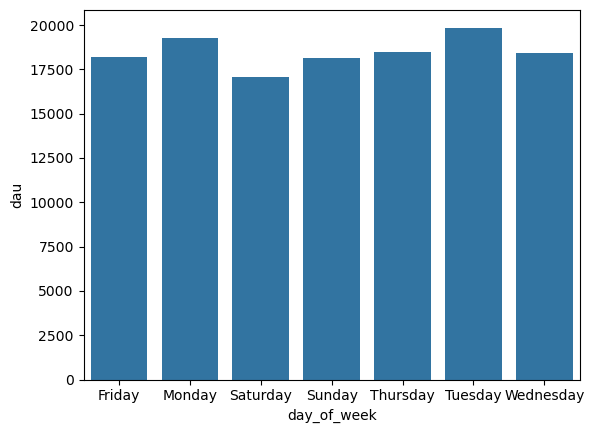

In [327]:
sns.barplot(avg_dau, x = 'day_of_week', y = 'dau')

## Analysis 2. Average time spent on website per event_type

In [332]:
data.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,date_ymd
0,2020-01-01 00:00:00,view,5809910,1602943681873052386,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,2020-01-01
1,2020-01-01 00:00:09,view,5812943,1487580012121948301,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,2020-01-01
2,2020-01-01 00:00:19,view,5798924,1783999068867920626,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,2020-01-01
3,2020-01-01 00:00:24,view,5793052,1487580005754995573,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,2020-01-01
4,2020-01-01 00:00:25,view,5899926,2115334439910245200,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,2020-01-01


In [338]:
duration = data.groupby('user_session')[['event_time']].agg(['max','min']).reset_index()
duration['duration'] = duration['event_time']['max'] - duration['event_time']['min']
duration.columns = ['user_session', 'max', 'min', 'duration']
duration

,user_session,max,min,duration
0,0000061d-f3e9-484b-8c73-e54f355032a3,2020-01-16 03:30:41,2020-01-16 03:30:41,0 days 00:00:00
1,00000ac8-0015-4f12-996a-be2896323738,2020-01-24 22:22:20,2020-01-24 22:22:20,0 days 00:00:00
2,00001ca1-f2df-4572-b0b8-e752e2064aae,2020-01-01 19:09:23,2020-01-01 19:09:23,0 days 00:00:00
3,00002db7-16b6-4db2-bf8b-7a1cb6bd0e7f,2020-01-22 16:51:50,2020-01-22 16:51:50,0 days 00:00:00
4,00002f68-09b8-4db3-a092-aeff45fd13ad,2020-01-25 07:17:58,2020-01-25 07:17:58,0 days 00:00:00
...,...,...,...,...
911569,ffff7b96-9751-4eaa-806e-fe979cc00dc8,2020-01-25 11:32:02,2020-01-24 16:57:30,0 days 18:34:32
911570,ffff80e2-ad33-4704-9ffe-d6c612e9641f,2020-01-21 18:07:47,2020-01-21 18:07:47,0 days 00:00:00
911571,ffff8da3-b79a-48f2-888c-117f2d1a7793,2020-01-26 10:53:09,2020-01-26 10:53:09,0 days 00:00:00
911572,ffff9422-39ba-4cdf-afd1-a9d87bb3d79b,2020-01-13 09:55:09,2020-01-13 09:55:09,0 days 00:00:00


In [345]:
duration_pivot = pd.pivot_table(data = data, index = 'user_session', columns = 'event_type', values = 'event_time',
                                aggfunc = 'count').reset_index().fillna(0)
duration_pivot

event_type,user_session,cart,purchase,remove_from_cart,view
0,0000061d-f3e9-484b-8c73-e54f355032a3,0.0,0.0,0.0,1.0
1,00000ac8-0015-4f12-996a-be2896323738,0.0,0.0,0.0,1.0
2,00001ca1-f2df-4572-b0b8-e752e2064aae,0.0,0.0,0.0,1.0
3,00002db7-16b6-4db2-bf8b-7a1cb6bd0e7f,0.0,0.0,0.0,1.0
4,00002f68-09b8-4db3-a092-aeff45fd13ad,0.0,0.0,0.0,1.0
...,...,...,...,...,...
911569,ffff7b96-9751-4eaa-806e-fe979cc00dc8,1.0,0.0,2.0,10.0
911570,ffff80e2-ad33-4704-9ffe-d6c612e9641f,0.0,0.0,0.0,1.0
911571,ffff8da3-b79a-48f2-888c-117f2d1a7793,0.0,0.0,0.0,1.0
911572,ffff9422-39ba-4cdf-afd1-a9d87bb3d79b,0.0,0.0,0.0,1.0


In [349]:
cart_session = list(duration_pivot.query('cart > 0')['user_session'])
purchase_session = list(duration_pivot.query('purchase > 0')['user_session'])

In [353]:
view_avg_duration = duration.query('user_session not in @cart_session and user_session not in @purchase_session')['duration'].mean()
cart_avg_duration = duration.query('user_session in @cart_session')['duration'].mean()
purchase_avg_duration = duration.query('user_session in @purchase_session')['duration'].mean()

print(f'average duration time for view users: {view_avg_duration}')
print(f'average duration time for cart users: {cart_avg_duration}')
print(f'average duration time for purchase users: {purchase_avg_duration}')

average duration time for view users: 0 days 00:38:30.953374025
average duration time for cart users: 0 days 02:39:48.642760643
average duration time for purchase users: 0 days 06:42:21.679333566


In [367]:
funnel = duration_pivot[['view', 'cart', 'remove_from_cart', 'purchase']].sum().reset_index()
funnel.columns = ['event_type', 'count']
funnel = funnel.query('event_type != "remove_from_cart"')
funnel

,event_type,count
0,view,2035188.0
1,cart,957169.0
3,purchase,184619.0


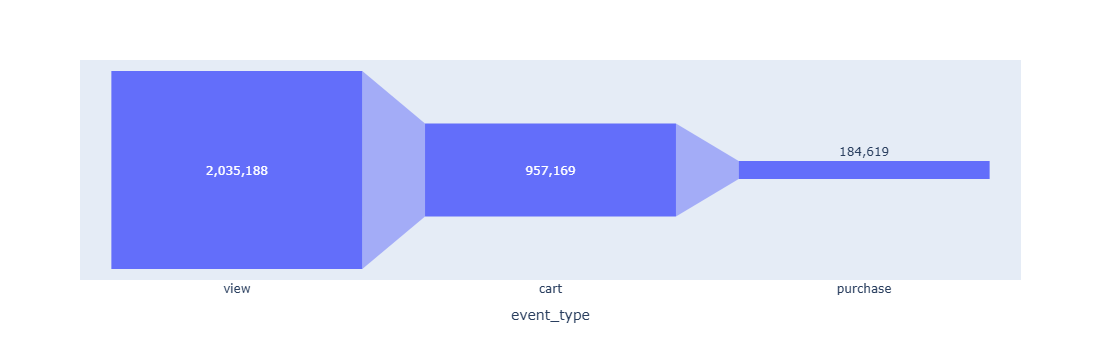

In [371]:
fig = px.funnel(data_frame = funnel, x = 'event_type', y = 'count')
fig.update_traces(texttemplate = '%{value:,.0f}')
fig.show()

In [377]:
view_to_cart = funnel['count'][1] / funnel['count'][0]
view_to_purchase = funnel['count'][3] / funnel['count'][0]


In [379]:
funnel['rate'] = [1, view_to_cart, view_to_purchase]
funnel

,event_type,count,rate
0,view,2035188.0,1.000000
1,cart,957169.0,0.470310
3,purchase,184619.0,0.090713


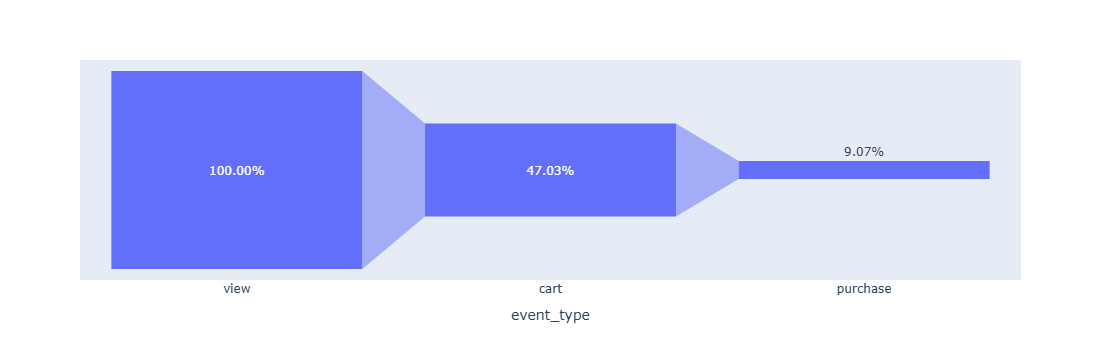

In [391]:
fig = px.funnel(data_frame = funnel, x = 'event_type', y = 'rate')
fig.update_traces(texttemplate="%{value:,.2%}")
fig.show()